<a href="https://colab.research.google.com/github/lemmynation/DataScienceEcosystem/blob/main/Copy_of_5_Experiments_in_Churn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1st Experiment (WITH Value Encoding Only)

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
pd.options.display.float_format = '{:.2f}'.format
import warnings
warnings.filterwarnings('ignore')

In [ ]:
from google.colab import  drive
drive.mount('/content/drive')

In [ ]:
path = '/content/drive/MyDrive/Data Science Masters/2023-2024 Second Sem/Machine Learning/churn.csv'
df = pd.read_csv(path)

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import * #ExtraTreesClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.tree import *

from sklearn import model_selection
from sklearn.model_selection import cross_val_score

In [ ]:
df.head()

,Unnamed: 0,college,income,overage,leftover,house,handset_price,over_15mins_calls_per_month,average_call_duration,reported_satisfaction,reported_usage_level,considering_change_of_plan,leave
0,1,zero,31953,0,6,313378,161,0,4,unsat,little,no,STAY
1,2,one,36147,0,13,800586,244,0,6,unsat,little,considering,STAY
2,3,one,27273,230,0,305049,201,16,15,unsat,very_little,perhaps,STAY
3,4,zero,120070,38,33,788235,780,3,2,unsat,very_high,considering,LEAVE
4,5,one,29215,208,85,224784,241,21,1,very_unsat,little,never_thought,STAY


In [ ]:
df = pd.get_dummies(df, drop_first=True)

In [ ]:
df.head()

,Unnamed: 0,income,overage,leftover,house,handset_price,over_15mins_calls_per_month,average_call_duration,college_zero,reported_satisfaction_sat,...,reported_satisfaction_very_unsat,reported_usage_level_high,reported_usage_level_little,reported_usage_level_very_high,reported_usage_level_very_little,considering_change_of_plan_considering,considering_change_of_plan_never_thought,considering_change_of_plan_no,considering_change_of_plan_perhaps,leave_STAY
0,1,31953,0,6,313378,161,0,4,True,False,...,False,False,True,False,False,False,False,True,False,True
1,2,36147,0,13,800586,244,0,6,False,False,...,False,False,True,False,False,True,False,False,False,True
2,3,27273,230,0,305049,201,16,15,False,False,...,False,False,False,False,True,False,False,False,True,True
3,4,120070,38,33,788235,780,3,2,True,False,...,False,False,False,True,False,True,False,False,False,False
4,5,29215,208,85,224784,241,21,1,False,False,...,True,False,True,False,False,False,True,False,False,True


In [ ]:
from sklearn.model_selection import train_test_split


x = df.drop(columns=['leave_STAY'])
y = df.leave_STAY # contains the target variable

xtrain_, xtest_, ytrain_, ytest_ = train_test_split(x, y, test_size=0.2, random_state = 42)

In [ ]:
def get_score(names, models, _X_train, _y_train, _X_test, _y_test, index):
    res = {' ':[index]} # key and a list containing the provided index as the value.
    for n, model in enumerate(models):
      trained = model.fit(_X_train, _y_train)
      score = trained.score(_X_test, _y_test)
      res[names[n]] = score
    df = pd.DataFrame(res).set_index(' ') # Converts the res dictionary into a DataFrame using pandas (pd.DataFrame(res))
    return df



In [ ]:
def get_validators():
  NN = MLPClassifier(max_iter = 1000)
  LR = LogisticRegression(max_iter = 1000)
  SVM = SVC()
  ABC = AdaBoostClassifier()
  GBC = GradientBoostingClassifier()
  KNN = KNeighborsClassifier()
  GNB = GaussianNB()
  ET = ExtraTreesClassifier()
  RF = RandomForestClassifier()
  DT = DecisionTreeClassifier()
  XGB = XGBClassifier()

  return ([     'Neural Network',
                'Logistic Regression',
                'Support Vector Machine',
                'Ada Boost Classifier',
                'Gradient Boosting Classifier',
                'K-Nearest Neighbors',
               'Gaussian Naive Bayes',
               'Extra Trees',
               'Random Forest',
               'Decision Tree',
               'XGB Classifier'],
          [NN, LR, SVM, ABC, GBC, KNN, GNB, ET, RF, DT, XGB])

In [ ]:
names, models = get_validators()
scores = get_score(names, models, xtrain_, ytrain_, xtest_, ytest_, 'Churn_Accu')

scores

,Neural Network,Logistic Regression,Support Vector Machine,Ada Boost Classifier,Gradient Boosting Classifier,K-Nearest Neighbors,Gaussian Naive Bayes,Extra Trees,Random Forest,Decision Tree,XGB Classifier
,,,,,,,,,,,
Churn_Accu,0.60,0.64,0.61,0.67,0.70,0.59,0.64,0.68,0.70,0.61,0.69


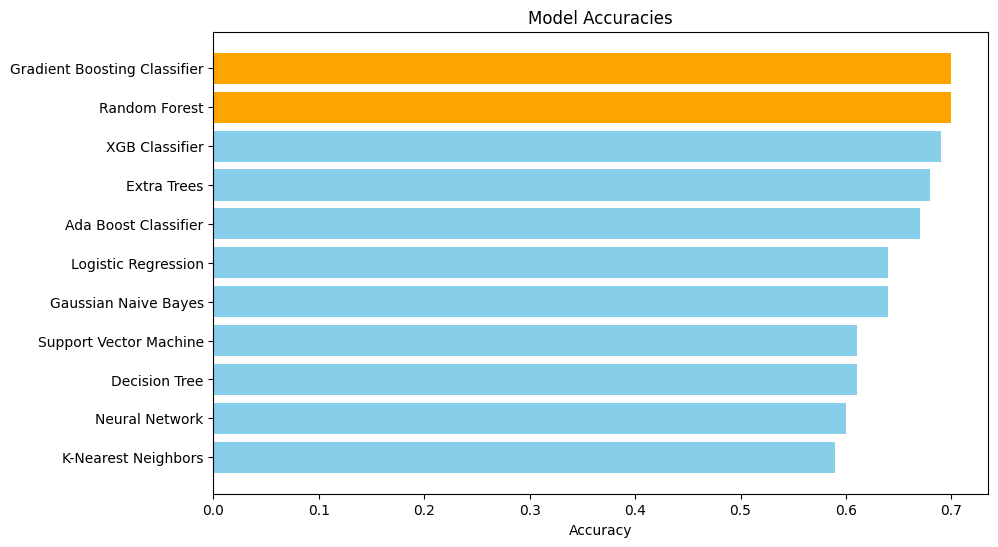

In [ ]:
import matplotlib.pyplot as plt

# Accuracy scores
accuracies = {
    'Neural Network': 0.60,
    'Logistic Regression': 0.64,
    'Support Vector Machine': 0.61,
    'Ada Boost Classifier': 0.67,
    'Gradient Boosting Classifier': 0.70,
    'K-Nearest Neighbors': 0.59,
    'Gaussian Naive Bayes': 0.64,
    'Extra Trees': 0.68,
    'Random Forest': 0.70,
    'Decision Tree': 0.61,
    'XGB Classifier': 0.69
}

# Sort accuracies from highest to lowest
sorted_accuracies = sorted(accuracies.items(), key=lambda x: x[1], reverse=True)
labels, scores = zip(*sorted_accuracies)

# Highlight the highest accuracy
colors = ['skyblue' if acc < max(scores) else 'orange' for acc in scores]

# Create bar plot
plt.figure(figsize=(10, 6))
plt.barh(labels, scores, color=colors)
plt.xlabel('Accuracy')
plt.title('Model Accuracies')
plt.gca().invert_yaxis()  # Invert y-axis to show highest accuracy on top
plt.show()

# 2ND Experiment (WITH Removing Outliers and Removing Unnecessary features in datasets)

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
pd.options.display.float_format = '{:.2f}'.format
import warnings
warnings.filterwarnings('ignore')

In [ ]:
from google.colab import  drive
drive.mount('/content/drive')

In [ ]:
path = '/content/drive/MyDrive/Data Science Masters/2023-2024 Second Sem/Machine Learning/churn.csv'
df = pd.read_csv(path)

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import * #ExtraTreesClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.tree import *

from sklearn import model_selection
from sklearn.model_selection import cross_val_score

In [ ]:
df.head()

,Unnamed: 0,college,income,overage,leftover,house,handset_price,over_15mins_calls_per_month,average_call_duration,reported_satisfaction,reported_usage_level,considering_change_of_plan,leave
0,1,zero,31953,0,6,313378,161,0,4,unsat,little,no,STAY
1,2,one,36147,0,13,800586,244,0,6,unsat,little,considering,STAY
2,3,one,27273,230,0,305049,201,16,15,unsat,very_little,perhaps,STAY
3,4,zero,120070,38,33,788235,780,3,2,unsat,very_high,considering,LEAVE
4,5,one,29215,208,85,224784,241,21,1,very_unsat,little,never_thought,STAY


In [ ]:
df = pd.get_dummies(df, drop_first=True)

In [ ]:
df.head()

,Unnamed: 0,income,overage,leftover,house,handset_price,over_15mins_calls_per_month,average_call_duration,college_zero,reported_satisfaction_sat,...,reported_satisfaction_very_unsat,reported_usage_level_high,reported_usage_level_little,reported_usage_level_very_high,reported_usage_level_very_little,considering_change_of_plan_considering,considering_change_of_plan_never_thought,considering_change_of_plan_no,considering_change_of_plan_perhaps,leave_STAY
0,1,31953,0,6,313378,161,0,4,True,False,...,False,False,True,False,False,False,False,True,False,True
1,2,36147,0,13,800586,244,0,6,False,False,...,False,False,True,False,False,True,False,False,False,True
2,3,27273,230,0,305049,201,16,15,False,False,...,False,False,False,False,True,False,False,False,True,True
3,4,120070,38,33,788235,780,3,2,True,False,...,False,False,False,True,False,True,False,False,False,False
4,5,29215,208,85,224784,241,21,1,False,False,...,True,False,True,False,False,False,True,False,False,True


**Handling Outlier**

In [ ]:
def outlier_imputer(column_name, percentile):
    # Calculate threshold
    threshold = df[column_name].quantile(percentile)
    # Impute threshold for values > than threshold
    df.loc[df[column_name] > threshold, column_name] = threshold

    print('{:>25} | percentile: {} | threshold: {}'.format(column_name, percentile, threshold))


for column in ['income', 'overage', 'leftover',
               'house', 'handset_price','over_15mins_calls_per_month','average_call_duration']:
               outlier_imputer(column, 0.95)

                   income | percentile: 0.95 | threshold: 151544.0
                  overage | percentile: 0.95 | threshold: 230.0
                 leftover | percentile: 0.95 | threshold: 80.0
                    house | percentile: 0.95 | threshold: 939777.9999999999
            handset_price | percentile: 0.95 | threshold: 825.0499999999993
over_15mins_calls_per_month | percentile: 0.95 | threshold: 26.0
    average_call_duration | percentile: 0.95 | threshold: 14.0


In [ ]:
df.describe()

,Unnamed: 0,income,overage,leftover,house,handset_price,over_15mins_calls_per_month,average_call_duration
count,20000.00,20000.00,20000.00,20000.00,20000.00,20000.00,20000.00,20000.00
mean,10000.50,80073.54,85.19,23.66,491638.04,387.73,7.90,5.96
std,5773.65,41309.03,84.53,26.29,249581.30,209.72,8.71,4.32
min,1.00,20007.00,-2.00,0.00,150002.00,130.00,0.00,1.00
25%,5000.75,42217.00,0.00,0.00,263714.25,219.00,1.00,2.00
50%,10000.50,75366.50,59.00,14.00,452259.50,326.00,4.00,5.00
75%,15000.25,115881.75,179.00,41.00,702378.00,533.25,15.00,10.00
max,20000.00,151544.00,230.00,80.00,939778.00,825.05,26.00,14.00


In [ ]:
df = df.drop(columns= 'Unnamed: 0')

In [ ]:
df.head()

,income,overage,leftover,house,handset_price,over_15mins_calls_per_month,average_call_duration,college_zero,reported_satisfaction_sat,reported_satisfaction_unsat,...,reported_satisfaction_very_unsat,reported_usage_level_high,reported_usage_level_little,reported_usage_level_very_high,reported_usage_level_very_little,considering_change_of_plan_considering,considering_change_of_plan_never_thought,considering_change_of_plan_no,considering_change_of_plan_perhaps,leave_STAY
0,31953,0,6,313378.00,161.00,0,4,True,False,True,...,False,False,True,False,False,False,False,True,False,True
1,36147,0,13,800586.00,244.00,0,6,False,False,True,...,False,False,True,False,False,True,False,False,False,True
2,27273,230,0,305049.00,201.00,16,14,False,False,True,...,False,False,False,False,True,False,False,False,True,True
3,120070,38,33,788235.00,780.00,3,2,True,False,True,...,False,False,False,True,False,True,False,False,False,False
4,29215,208,80,224784.00,241.00,21,1,False,False,False,...,True,False,True,False,False,False,True,False,False,True


In [ ]:
from sklearn.model_selection import train_test_split


x = df.drop(columns=['leave_STAY'])
y = df.leave_STAY # contains the target variable

xtrain_, xtest_, ytrain_, ytest_ = train_test_split(x, y, test_size=0.2, random_state = 42)

In [ ]:
def get_score(names, models, _X_train, _y_train, _X_test, _y_test, index):
    res = {' ':[index]} # key and a list containing the provided index as the value.
    for n, model in enumerate(models):
      trained = model.fit(_X_train, _y_train)
      score = trained.score(_X_test, _y_test)
      res[names[n]] = score
    df = pd.DataFrame(res).set_index(' ') # Converts the res dictionary into a DataFrame using pandas (pd.DataFrame(res))
    return df



In [ ]:
def get_validators():
  NN = MLPClassifier(max_iter = 1000)
  LR = LogisticRegression(max_iter = 1000)
  SVM = SVC()
  ABC = AdaBoostClassifier()
  GBC = GradientBoostingClassifier()
  KNN = KNeighborsClassifier()
  GNB = GaussianNB()
  ET = ExtraTreesClassifier()
  RF = RandomForestClassifier()
  DT = DecisionTreeClassifier()
  XGB = XGBClassifier()

  return ([     'Neural Network',
                'Logistic Regression',
                'Support Vector Machine',
                'Ada Boost Classifier',
                'Gradient Boosting Classifier',
                'K-Nearest Neighbors',
               'Gaussian Naive Bayes',
               'Extra Trees',
               'Random Forest',
               'Decision Tree',
               'XGB Classifier'],
          [NN, LR, SVM, ABC, GBC, KNN, GNB, ET, RF, DT, XGB])

In [ ]:
names, models = get_validators()
scores = get_score(names, models, xtrain_, ytrain_, xtest_, ytest_, 'Churn_Accu')

scores

,Neural Network,Logistic Regression,Support Vector Machine,Ada Boost Classifier,Gradient Boosting Classifier,K-Nearest Neighbors,Gaussian Naive Bayes,Extra Trees,Random Forest,Decision Tree,XGB Classifier
,,,,,,,,,,,
Churn_Accu,0.62,0.64,0.61,0.67,0.70,0.58,0.64,0.68,0.70,0.62,0.69


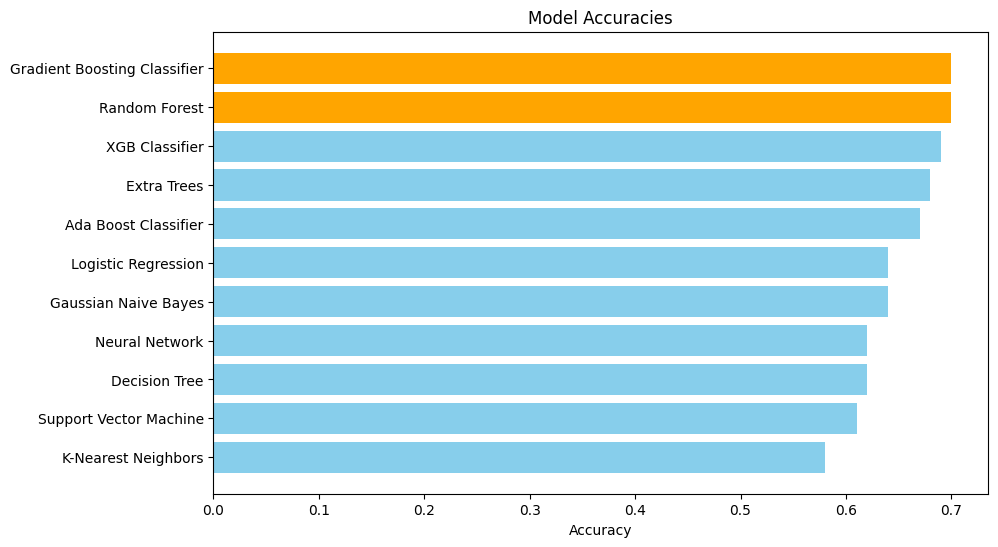

In [ ]:
import matplotlib.pyplot as plt

# Model names and accuracy scores
models = [
    'Neural Network', 'Logistic Regression', 'Support Vector Machine',
    'Ada Boost Classifier', 'Gradient Boosting Classifier',
    'K-Nearest Neighbors', 'Gaussian Naive Bayes', 'Extra Trees',
    'Random Forest', 'Decision Tree', 'XGB Classifier'
]
accuracies = [
    0.62, 0.64, 0.61, 0.67, 0.70, 0.58, 0.64, 0.68, 0.70, 0.62, 0.69
]

# Sort models and accuracies by accuracy in descending order
sorted_indices = sorted(range(len(accuracies)), key=lambda k: accuracies[k], reverse=True)
sorted_models = [models[i] for i in sorted_indices]
sorted_accuracies = [accuracies[i] for i in sorted_indices]

# Highlight the highest accuracy
colors = ['orange' if acc == max(sorted_accuracies) else 'skyblue' for acc in sorted_accuracies]

# Create bar plot
plt.figure(figsize=(10, 6))
plt.barh(sorted_models, sorted_accuracies, color=colors)
plt.xlabel('Accuracy')
plt.title('Model Accuracies')
plt.gca().invert_yaxis()  # Invert y-axis to show highest accuracy on top
plt.show()

# 3RD Experiment (WITH Removing Outliers and Removing Unnecessary features in datasets, WITH SMOTE TECHNIQUE)

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
pd.options.display.float_format = '{:.2f}'.format
import warnings
warnings.filterwarnings('ignore')

In [ ]:
from google.colab import  drive
drive.mount('/content/drive')

In [ ]:
path = '/content/drive/MyDrive/Data Science Masters/2023-2024 Second Sem/Machine Learning/churn.csv'
df = pd.read_csv(path)

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import * #ExtraTreesClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.tree import *

from sklearn import model_selection
from sklearn.model_selection import cross_val_score

In [ ]:
df.head()

,Unnamed: 0,college,income,overage,leftover,house,handset_price,over_15mins_calls_per_month,average_call_duration,reported_satisfaction,reported_usage_level,considering_change_of_plan,leave
0,1,zero,31953,0,6,313378,161,0,4,unsat,little,no,STAY
1,2,one,36147,0,13,800586,244,0,6,unsat,little,considering,STAY
2,3,one,27273,230,0,305049,201,16,15,unsat,very_little,perhaps,STAY
3,4,zero,120070,38,33,788235,780,3,2,unsat,very_high,considering,LEAVE
4,5,one,29215,208,85,224784,241,21,1,very_unsat,little,never_thought,STAY


In [ ]:
df = pd.get_dummies(df, drop_first=True)

In [ ]:
df.head()

,Unnamed: 0,income,overage,leftover,house,handset_price,over_15mins_calls_per_month,average_call_duration,college_zero,reported_satisfaction_sat,...,reported_satisfaction_very_unsat,reported_usage_level_high,reported_usage_level_little,reported_usage_level_very_high,reported_usage_level_very_little,considering_change_of_plan_considering,considering_change_of_plan_never_thought,considering_change_of_plan_no,considering_change_of_plan_perhaps,leave_STAY
0,1,31953,0,6,313378,161,0,4,True,False,...,False,False,True,False,False,False,False,True,False,True
1,2,36147,0,13,800586,244,0,6,False,False,...,False,False,True,False,False,True,False,False,False,True
2,3,27273,230,0,305049,201,16,15,False,False,...,False,False,False,False,True,False,False,False,True,True
3,4,120070,38,33,788235,780,3,2,True,False,...,False,False,False,True,False,True,False,False,False,False
4,5,29215,208,85,224784,241,21,1,False,False,...,True,False,True,False,False,False,True,False,False,True


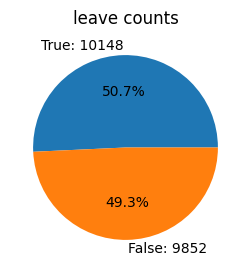

In [ ]:
fig = plt.figure(figsize=(3,3))
data=df['leave_STAY'].value_counts()
plt.pie(data,
        labels=[f'{data.index[0]}: {data.values[0]}',
                f'{data.index[1]}: {data.values[1]}'],
        autopct='%1.1f%%'
        )
plt.title('leave counts');

**Handling Outlier**

In [ ]:
def outlier_imputer(column_name, percentile):
    # Calculate threshold
    threshold = df[column_name].quantile(percentile)
    # Impute threshold for values > than threshold
    df.loc[df[column_name] > threshold, column_name] = threshold

    print('{:>25} | percentile: {} | threshold: {}'.format(column_name, percentile, threshold))


for column in ['income', 'overage', 'leftover',
               'house', 'handset_price','over_15mins_calls_per_month','average_call_duration']:
               outlier_imputer(column, 0.95)

                   income | percentile: 0.95 | threshold: 151544.0
                  overage | percentile: 0.95 | threshold: 230.0
                 leftover | percentile: 0.95 | threshold: 80.0
                    house | percentile: 0.95 | threshold: 939777.9999999999
            handset_price | percentile: 0.95 | threshold: 825.0499999999993
over_15mins_calls_per_month | percentile: 0.95 | threshold: 26.0
    average_call_duration | percentile: 0.95 | threshold: 14.0


In [ ]:
df.describe()

,Unnamed: 0,income,overage,leftover,house,handset_price,over_15mins_calls_per_month,average_call_duration
count,20000.00,20000.00,20000.00,20000.00,20000.00,20000.00,20000.00,20000.00
mean,10000.50,80073.54,85.19,23.66,491638.04,387.73,7.90,5.96
std,5773.65,41309.03,84.53,26.29,249581.30,209.72,8.71,4.32
min,1.00,20007.00,-2.00,0.00,150002.00,130.00,0.00,1.00
25%,5000.75,42217.00,0.00,0.00,263714.25,219.00,1.00,2.00
50%,10000.50,75366.50,59.00,14.00,452259.50,326.00,4.00,5.00
75%,15000.25,115881.75,179.00,41.00,702378.00,533.25,15.00,10.00
max,20000.00,151544.00,230.00,80.00,939778.00,825.05,26.00,14.00


In [ ]:
df = df.drop(columns= 'Unnamed: 0')

In [ ]:
df.head()

,income,overage,leftover,house,handset_price,over_15mins_calls_per_month,average_call_duration,college_zero,reported_satisfaction_sat,reported_satisfaction_unsat,...,reported_satisfaction_very_unsat,reported_usage_level_high,reported_usage_level_little,reported_usage_level_very_high,reported_usage_level_very_little,considering_change_of_plan_considering,considering_change_of_plan_never_thought,considering_change_of_plan_no,considering_change_of_plan_perhaps,leave_STAY
0,31953,0,6,313378.00,161.00,0,4,True,False,True,...,False,False,True,False,False,False,False,True,False,True
1,36147,0,13,800586.00,244.00,0,6,False,False,True,...,False,False,True,False,False,True,False,False,False,True
2,27273,230,0,305049.00,201.00,16,14,False,False,True,...,False,False,False,False,True,False,False,False,True,True
3,120070,38,33,788235.00,780.00,3,2,True,False,True,...,False,False,False,True,False,True,False,False,False,False
4,29215,208,80,224784.00,241.00,21,1,False,False,False,...,True,False,True,False,False,False,True,False,False,True


before Counter({True: 10148, False: 9852})
after Counter({True: 10148, False: 10148})


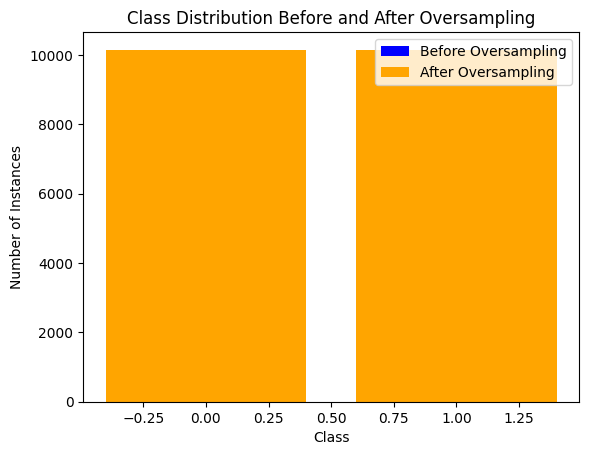

In [ ]:
from imblearn.over_sampling import SMOTE, RandomOverSampler
from collections import Counter
import matplotlib.pyplot as plt


x = df.drop(columns=['leave_STAY'])
y = df.leave_STAY # contains the target variable

# The output will show the class distribution before applying SMOTE.
print('before',Counter(y))

smote = SMOTE()
smotex, smotey = smote.fit_resample(x, y)

print('after', Counter(smotey))

plt.bar(Counter(y).keys(), Counter(y).values(), color='blue', label='Before Oversampling')
plt.bar(Counter(smotey).keys(), Counter(smotey).values(), color='orange', label='After Oversampling')
plt.legend()
plt.xlabel('Class')
plt.ylabel('Number of Instances')
plt.title('Class Distribution Before and After Oversampling')
plt.show()


In [ ]:
from sklearn.model_selection import train_test_split



xtrain_, xtest_, ytrain_, ytest_ = train_test_split(smotex, smotey, test_size=0.2, random_state = 42)

In [ ]:
def get_score(names, models, _X_train, _y_train, _X_test, _y_test, index):
    res = {' ':[index]} # key and a list containing the provided index as the value.
    for n, model in enumerate(models):
      trained = model.fit(_X_train, _y_train)
      score = trained.score(_X_test, _y_test)
      res[names[n]] = score
    df = pd.DataFrame(res).set_index(' ') # Converts the res dictionary into a DataFrame using pandas (pd.DataFrame(res))
    return df



In [ ]:
def get_validators():
  NN = MLPClassifier(max_iter = 1000)
  LR = LogisticRegression(max_iter = 1000)
  SVM = SVC()
  ABC = AdaBoostClassifier()
  GBC = GradientBoostingClassifier()
  KNN = KNeighborsClassifier()
  GNB = GaussianNB()
  ET = ExtraTreesClassifier()
  RF = RandomForestClassifier()
  DT = DecisionTreeClassifier()
  XGB = XGBClassifier()

  return ([     'Neural Network',
                'Logistic Regression',
                'Support Vector Machine',
                'Ada Boost Classifier',
                'Gradient Boosting Classifier',
                'K-Nearest Neighbors',
               'Gaussian Naive Bayes',
               'Extra Trees',
               'Random Forest',
               'Decision Tree',
               'XGB Classifier'],
          [NN, LR, SVM, ABC, GBC, KNN, GNB, ET, RF, DT, XGB])

In [ ]:
names, models = get_validators()
scores = get_score(names, models, xtrain_, ytrain_, xtest_, ytest_, 'Churn_Accu')

scores

,Neural Network,Logistic Regression,Support Vector Machine,Ada Boost Classifier,Gradient Boosting Classifier,K-Nearest Neighbors,Gaussian Naive Bayes,Extra Trees,Random Forest,Decision Tree,XGB Classifier
,,,,,,,,,,,
Churn_Accu,0.58,0.64,0.62,0.67,0.71,0.60,0.64,0.67,0.69,0.61,0.69


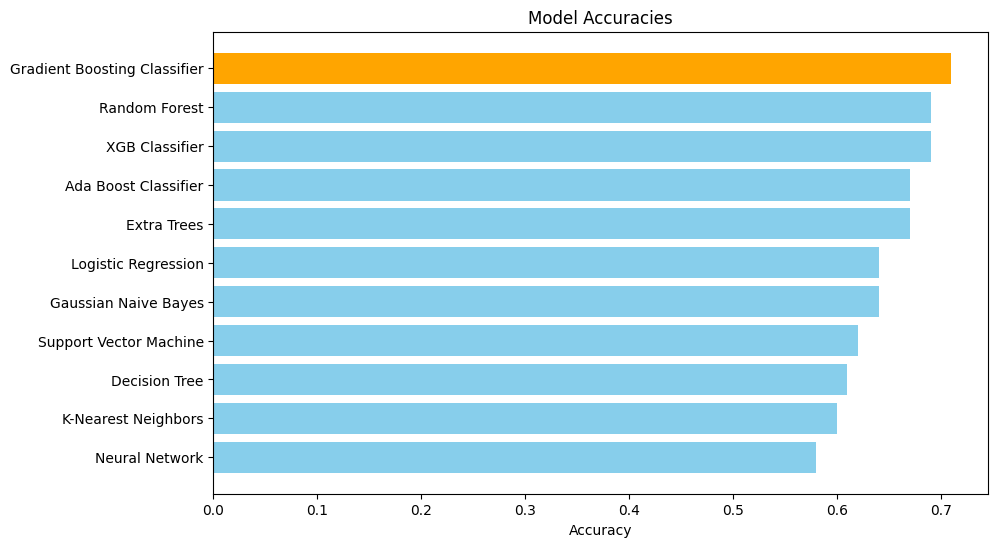

In [ ]:
import matplotlib.pyplot as plt

# Model names and accuracy scores
models = [
    'Neural Network', 'Logistic Regression', 'Support Vector Machine',
    'Ada Boost Classifier', 'Gradient Boosting Classifier',
    'K-Nearest Neighbors', 'Gaussian Naive Bayes', 'Extra Trees',
    'Random Forest', 'Decision Tree', 'XGB Classifier'
]
accuracies = [
    0.58, 0.64, 0.62, 0.67, 0.71, 0.60, 0.64, 0.67, 0.69, 0.61, 0.69
]

# Sort models and accuracies by accuracy in descending order
sorted_indices = sorted(range(len(accuracies)), key=lambda k: accuracies[k], reverse=True)
sorted_models = [models[i] for i in sorted_indices]
sorted_accuracies = [accuracies[i] for i in sorted_indices]

# Highlight the highest accuracy
colors = ['orange' if acc == max(sorted_accuracies) else 'skyblue' for acc in sorted_accuracies]

# Create bar plot
plt.figure(figsize=(10, 6))
plt.barh(sorted_models, sorted_accuracies, color=colors)
plt.xlabel('Accuracy')
plt.title('Model Accuracies')
plt.gca().invert_yaxis()  # Invert y-axis to show highest accuracy on top
plt.show()

# 4th Experiment (WITH Removing Outliers and Removing Unnecessary features in datasets, WITH SMOTE TECHNIQUE, Normalization Technique, Standard Scalar)

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
pd.options.display.float_format = '{:.2f}'.format
import warnings
warnings.filterwarnings('ignore')

In [ ]:
from google.colab import  drive
drive.mount('/content/drive')

In [ ]:
path = '/content/drive/MyDrive/Data Science Masters/2023-2024 Second Sem/Machine Learning/churn.csv'
df = pd.read_csv(path)

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import * #ExtraTreesClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.tree import *

from sklearn import model_selection
from sklearn.model_selection import cross_val_score

In [ ]:
df.head()

,income,overage,leftover,house,handset_price,over_15mins_calls_per_month,average_call_duration,college_zero,reported_satisfaction_sat,reported_satisfaction_unsat,...,reported_satisfaction_very_unsat,reported_usage_level_high,reported_usage_level_little,reported_usage_level_very_high,reported_usage_level_very_little,considering_change_of_plan_considering,considering_change_of_plan_never_thought,considering_change_of_plan_no,considering_change_of_plan_perhaps,leave_STAY
0,31953,0,6,313378.00,161.00,0,4,True,False,True,...,False,False,True,False,False,False,False,True,False,True
1,36147,0,13,800586.00,244.00,0,6,False,False,True,...,False,False,True,False,False,True,False,False,False,True
2,27273,230,0,305049.00,201.00,16,14,False,False,True,...,False,False,False,False,True,False,False,False,True,True
3,120070,38,33,788235.00,780.00,3,2,True,False,True,...,False,False,False,True,False,True,False,False,False,False
4,29215,208,80,224784.00,241.00,21,1,False,False,False,...,True,False,True,False,False,False,True,False,False,True


In [ ]:
df = pd.get_dummies(df, drop_first=True)

In [ ]:
df.head()

,Unnamed: 0,income,overage,leftover,house,handset_price,over_15mins_calls_per_month,average_call_duration,college_zero,reported_satisfaction_sat,...,reported_satisfaction_very_unsat,reported_usage_level_high,reported_usage_level_little,reported_usage_level_very_high,reported_usage_level_very_little,considering_change_of_plan_considering,considering_change_of_plan_never_thought,considering_change_of_plan_no,considering_change_of_plan_perhaps,leave_STAY
0,1,31953,0,6,313378,161,0,4,True,False,...,False,False,True,False,False,False,False,True,False,True
1,2,36147,0,13,800586,244,0,6,False,False,...,False,False,True,False,False,True,False,False,False,True
2,3,27273,230,0,305049,201,16,15,False,False,...,False,False,False,False,True,False,False,False,True,True
3,4,120070,38,33,788235,780,3,2,True,False,...,False,False,False,True,False,True,False,False,False,False
4,5,29215,208,85,224784,241,21,1,False,False,...,True,False,True,False,False,False,True,False,False,True


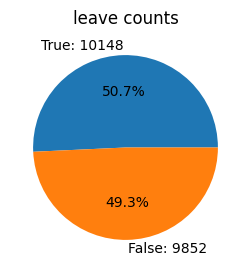

In [ ]:
fig = plt.figure(figsize=(3,3))
data=df['leave_STAY'].value_counts()
plt.pie(data,
        labels=[f'{data.index[0]}: {data.values[0]}',
                f'{data.index[1]}: {data.values[1]}'],
        autopct='%1.1f%%'
        )
plt.title('leave counts');

**Handling Outlier**

In [ ]:
def outlier_imputer(column_name, percentile):
    # Calculate threshold
    threshold = df[column_name].quantile(percentile)
    # Impute threshold for values > than threshold
    df.loc[df[column_name] > threshold, column_name] = threshold

    print('{:>25} | percentile: {} | threshold: {}'.format(column_name, percentile, threshold))


for column in ['income', 'overage', 'leftover',
               'house', 'handset_price','over_15mins_calls_per_month','average_call_duration']:
               outlier_imputer(column, 0.95)

                   income | percentile: 0.95 | threshold: 151544.0
                  overage | percentile: 0.95 | threshold: 230.0
                 leftover | percentile: 0.95 | threshold: 80.0
                    house | percentile: 0.95 | threshold: 939773.25
            handset_price | percentile: 0.95 | threshold: 825.0024999999999
over_15mins_calls_per_month | percentile: 0.95 | threshold: 26.0
    average_call_duration | percentile: 0.95 | threshold: 14.0


In [ ]:
df.describe()

,income,overage,leftover,house,handset_price,over_15mins_calls_per_month,average_call_duration
count,20000.00,20000.00,20000.00,20000.00,20000.00,20000.00,20000.00
mean,80073.54,85.19,23.66,491637.80,387.73,7.90,5.96
std,41309.03,84.53,26.29,249580.88,209.71,8.71,4.32
min,20007.00,-2.00,0.00,150002.00,130.00,0.00,1.00
25%,42217.00,0.00,0.00,263714.25,219.00,1.00,2.00
50%,75366.50,59.00,14.00,452259.50,326.00,4.00,5.00
75%,115881.75,179.00,41.00,702378.00,533.25,15.00,10.00
max,151544.00,230.00,80.00,939773.25,825.00,26.00,14.00


In [ ]:
df.head()

,income,overage,leftover,house,handset_price,over_15mins_calls_per_month,average_call_duration,college_zero,reported_satisfaction_sat,reported_satisfaction_unsat,...,reported_satisfaction_very_unsat,reported_usage_level_high,reported_usage_level_little,reported_usage_level_very_high,reported_usage_level_very_little,considering_change_of_plan_considering,considering_change_of_plan_never_thought,considering_change_of_plan_no,considering_change_of_plan_perhaps,leave_STAY
0,31953,0,6,313378.00,161.00,0,4,True,False,True,...,False,False,True,False,False,False,False,True,False,True
1,36147,0,13,800586.00,244.00,0,6,False,False,True,...,False,False,True,False,False,True,False,False,False,True
2,27273,230,0,305049.00,201.00,16,14,False,False,True,...,False,False,False,False,True,False,False,False,True,True
3,120070,38,33,788235.00,780.00,3,2,True,False,True,...,False,False,False,True,False,True,False,False,False,False
4,29215,208,80,224784.00,241.00,21,1,False,False,False,...,True,False,True,False,False,False,True,False,False,True


before Counter({True: 10148, False: 9852})
after Counter({True: 10148, False: 10148})


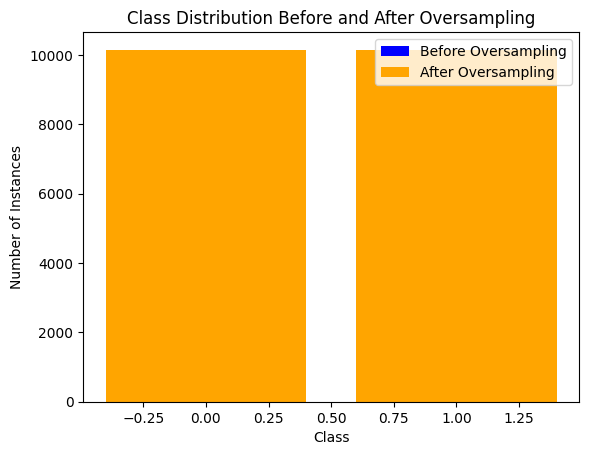

In [ ]:
from imblearn.over_sampling import SMOTE, RandomOverSampler
from collections import Counter
import matplotlib.pyplot as plt


x = df.drop(columns=['leave_STAY'])
y = df.leave_STAY # contains the target variable

# The output will show the class distribution before applying SMOTE.
print('before',Counter(y))

smote = SMOTE()
smotex, smotey = smote.fit_resample(x, y)

print('after', Counter(smotey))

plt.bar(Counter(y).keys(), Counter(y).values(), color='blue', label='Before Oversampling')
plt.bar(Counter(smotey).keys(), Counter(smotey).values(), color='orange', label='After Oversampling')
plt.legend()
plt.xlabel('Class')
plt.ylabel('Number of Instances')
plt.title('Class Distribution Before and After Oversampling')
plt.show()


In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

for col in x:
  smotex[col] = smotex[col].astype(float)
  smotex[[col]] = scaler.fit_transform(smotex[[col]])

smotex.head()

,income,overage,leftover,house,handset_price,over_15mins_calls_per_month,average_call_duration,college_zero,reported_satisfaction_sat,reported_satisfaction_unsat,reported_satisfaction_very_sat,reported_satisfaction_very_unsat,reported_usage_level_high,reported_usage_level_little,reported_usage_level_very_high,reported_usage_level_very_little,considering_change_of_plan_considering,considering_change_of_plan_never_thought,considering_change_of_plan_no,considering_change_of_plan_perhaps
0,-1.17,-1.01,-0.67,-0.71,-1.08,-0.91,-0.45,1.00,-0.23,1.99,-0.59,-0.82,-0.34,1.23,-0.59,-0.51,-0.82,-0.33,1.97,-0.24
1,-1.06,-1.01,-0.41,1.24,-0.69,-0.91,0.01,-1.00,-0.23,1.99,-0.59,-0.82,-0.34,1.23,-0.59,-0.51,1.23,-0.33,-0.51,-0.24
2,-1.28,1.71,-0.90,-0.74,-0.89,0.93,1.87,-1.00,-0.23,1.99,-0.59,-0.82,-0.34,-0.81,-0.59,1.98,-0.82,-0.33,-0.51,4.19
3,0.97,-0.56,0.36,1.19,1.87,-0.57,-0.92,1.00,-0.23,1.99,-0.59,-0.82,-0.34,-0.81,1.69,-0.51,1.23,-0.33,-0.51,-0.24
4,-1.23,1.45,2.15,-1.07,-0.70,1.51,-1.15,-1.00,-0.23,-0.50,-0.59,1.23,-0.34,1.23,-0.59,-0.51,-0.82,3.00,-0.51,-0.24


In [ ]:
from sklearn.model_selection import train_test_split



xtrain_, xtest_, ytrain_, ytest_ = train_test_split(smotex, smotey, test_size=0.2, random_state = 42)

In [ ]:
def get_score(names, models, _X_train, _y_train, _X_test, _y_test, index):
    res = {' ':[index]} # key and a list containing the provided index as the value.
    for n, model in enumerate(models):
      trained = model.fit(_X_train, _y_train)
      score = trained.score(_X_test, _y_test)
      res[names[n]] = score
    df = pd.DataFrame(res).set_index(' ') # Converts the res dictionary into a DataFrame using pandas (pd.DataFrame(res))
    return df



In [ ]:
def get_validators():
  NN = MLPClassifier(max_iter = 1000)
  LR = LogisticRegression(max_iter = 1000)
  SVM = SVC()
  ABC = AdaBoostClassifier()
  GBC = GradientBoostingClassifier()
  KNN = KNeighborsClassifier()
  GNB = GaussianNB()
  ET = ExtraTreesClassifier()
  RF = RandomForestClassifier()
  DT = DecisionTreeClassifier()
  XGB = XGBClassifier()

  return ([     'Neural Network',
                'Logistic Regression',
                'Support Vector Machine',
                'Ada Boost Classifier',
                'Gradient Boosting Classifier',
                'K-Nearest Neighbors',
               'Gaussian Naive Bayes',
               'Extra Trees',
               'Random Forest',
               'Decision Tree',
               'XGB Classifier'],
          [NN, LR, SVM, ABC, GBC, KNN, GNB, ET, RF, DT, XGB])

In [ ]:
names, models = get_validators()
scores = get_score(names, models, xtrain_, ytrain_, xtest_, ytest_, 'Churn_Accu')

scores

,Neural Network,Logistic Regression,Support Vector Machine,Ada Boost Classifier,Gradient Boosting Classifier,K-Nearest Neighbors,Gaussian Naive Bayes,Extra Trees,Random Forest,Decision Tree,XGB Classifier
,,,,,,,,,,,
Churn_Accu,0.66,0.64,0.67,0.67,0.71,0.62,0.63,0.67,0.69,0.61,0.69


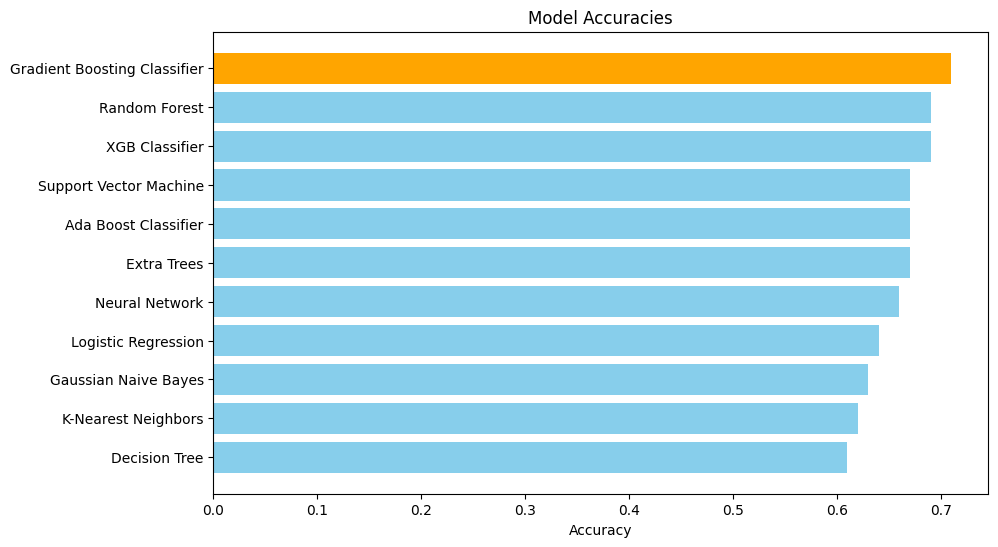

In [ ]:
import matplotlib.pyplot as plt

# Model names and accuracy scores
models = [
    'Neural Network', 'Logistic Regression', 'Support Vector Machine',
    'Ada Boost Classifier', 'Gradient Boosting Classifier',
    'K-Nearest Neighbors', 'Gaussian Naive Bayes', 'Extra Trees',
    'Random Forest', 'Decision Tree', 'XGB Classifier'
]
accuracies = [
    0.66, 0.64, 0.67, 0.67, 0.71, 0.62, 0.63, 0.67, 0.69, 0.61, 0.69
]

# Sort models and accuracies by accuracy in descending order
sorted_indices = sorted(range(len(accuracies)), key=lambda k: accuracies[k], reverse=True)
sorted_models = [models[i] for i in sorted_indices]
sorted_accuracies = [accuracies[i] for i in sorted_indices]

# Highlight the highest accuracy
colors = ['orange' if acc == max(sorted_accuracies) else 'skyblue' for acc in sorted_accuracies]

# Create bar plot
plt.figure(figsize=(10, 6))
plt.barh(sorted_models, sorted_accuracies, color=colors)
plt.xlabel('Accuracy')
plt.title('Model Accuracies')
plt.gca().invert_yaxis()  # Invert y-axis to show highest accuracy on top
plt.show()

# 5th Experiment (WITH Removing Outliers and Removing Unnecessary features in datasets, WITH SMOTE TECHNIQUE, Normalization Technique, Standard Scalar, WITH Cross Validation)

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
pd.options.display.float_format = '{:.2f}'.format
import warnings
warnings.filterwarnings('ignore')

In [ ]:
from google.colab import  drive
drive.mount('/content/drive')

In [ ]:
path = '/content/drive/MyDrive/Data Science Masters/2023-2024 Second Sem/Machine Learning/churn.csv'
df = pd.read_csv(path)

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import * #ExtraTreesClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.tree import *

from sklearn import model_selection
from sklearn.model_selection import cross_val_score

In [ ]:
df.head()

,income,overage,leftover,house,handset_price,over_15mins_calls_per_month,average_call_duration,college_zero,reported_satisfaction_sat,reported_satisfaction_unsat,...,reported_satisfaction_very_unsat,reported_usage_level_high,reported_usage_level_little,reported_usage_level_very_high,reported_usage_level_very_little,considering_change_of_plan_considering,considering_change_of_plan_never_thought,considering_change_of_plan_no,considering_change_of_plan_perhaps,leave_STAY
0,31953,0,6,313378.00,161.00,0,4,True,False,True,...,False,False,True,False,False,False,False,True,False,True
1,36147,0,13,800586.00,244.00,0,6,False,False,True,...,False,False,True,False,False,True,False,False,False,True
2,27273,230,0,305049.00,201.00,16,14,False,False,True,...,False,False,False,False,True,False,False,False,True,True
3,120070,38,33,788235.00,780.00,3,2,True,False,True,...,False,False,False,True,False,True,False,False,False,False
4,29215,208,80,224784.00,241.00,21,1,False,False,False,...,True,False,True,False,False,False,True,False,False,True


In [ ]:
df = pd.get_dummies(df, drop_first=True)

In [ ]:
df.head()

,Unnamed: 0,income,overage,leftover,house,handset_price,over_15mins_calls_per_month,average_call_duration,college_zero,reported_satisfaction_sat,...,reported_satisfaction_very_unsat,reported_usage_level_high,reported_usage_level_little,reported_usage_level_very_high,reported_usage_level_very_little,considering_change_of_plan_considering,considering_change_of_plan_never_thought,considering_change_of_plan_no,considering_change_of_plan_perhaps,leave_STAY
0,1,31953,0,6,313378,161,0,4,True,False,...,False,False,True,False,False,False,False,True,False,True
1,2,36147,0,13,800586,244,0,6,False,False,...,False,False,True,False,False,True,False,False,False,True
2,3,27273,230,0,305049,201,16,15,False,False,...,False,False,False,False,True,False,False,False,True,True
3,4,120070,38,33,788235,780,3,2,True,False,...,False,False,False,True,False,True,False,False,False,False
4,5,29215,208,85,224784,241,21,1,False,False,...,True,False,True,False,False,False,True,False,False,True


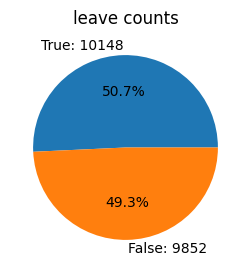

In [ ]:
fig = plt.figure(figsize=(3,3))
data=df['leave_STAY'].value_counts()
plt.pie(data,
        labels=[f'{data.index[0]}: {data.values[0]}',
                f'{data.index[1]}: {data.values[1]}'],
        autopct='%1.1f%%'
        )
plt.title('leave counts');

**Handling Outlier**

In [ ]:
def outlier_imputer(column_name, percentile):
    # Calculate threshold
    threshold = df[column_name].quantile(percentile)
    # Impute threshold for values > than threshold
    df.loc[df[column_name] > threshold, column_name] = threshold

    print('{:>25} | percentile: {} | threshold: {}'.format(column_name, percentile, threshold))


for column in ['income', 'overage', 'leftover',
               'house', 'handset_price','over_15mins_calls_per_month','average_call_duration']:
               outlier_imputer(column, 0.95)

                   income | percentile: 0.95 | threshold: 151544.0
                  overage | percentile: 0.95 | threshold: 230.0
                 leftover | percentile: 0.95 | threshold: 80.0
                    house | percentile: 0.95 | threshold: 939773.0125
            handset_price | percentile: 0.95 | threshold: 825.000125
over_15mins_calls_per_month | percentile: 0.95 | threshold: 26.0
    average_call_duration | percentile: 0.95 | threshold: 14.0


In [ ]:
df.describe()

,income,overage,leftover,house,handset_price,over_15mins_calls_per_month,average_call_duration
count,20000.00,20000.00,20000.00,20000.00,20000.00,20000.00,20000.00
mean,80073.54,85.19,23.66,491637.79,387.73,7.90,5.96
std,41309.03,84.53,26.29,249580.86,209.71,8.71,4.32
min,20007.00,-2.00,0.00,150002.00,130.00,0.00,1.00
25%,42217.00,0.00,0.00,263714.25,219.00,1.00,2.00
50%,75366.50,59.00,14.00,452259.50,326.00,4.00,5.00
75%,115881.75,179.00,41.00,702378.00,533.25,15.00,10.00
max,151544.00,230.00,80.00,939773.01,825.00,26.00,14.00


In [ ]:
df.head()

,income,overage,leftover,house,handset_price,over_15mins_calls_per_month,average_call_duration,college_zero,reported_satisfaction_sat,reported_satisfaction_unsat,...,reported_satisfaction_very_unsat,reported_usage_level_high,reported_usage_level_little,reported_usage_level_very_high,reported_usage_level_very_little,considering_change_of_plan_considering,considering_change_of_plan_never_thought,considering_change_of_plan_no,considering_change_of_plan_perhaps,leave_STAY
0,31953,0,6,313378.00,161.00,0,4,True,False,True,...,False,False,True,False,False,False,False,True,False,True
1,36147,0,13,800586.00,244.00,0,6,False,False,True,...,False,False,True,False,False,True,False,False,False,True
2,27273,230,0,305049.00,201.00,16,14,False,False,True,...,False,False,False,False,True,False,False,False,True,True
3,120070,38,33,788235.00,780.00,3,2,True,False,True,...,False,False,False,True,False,True,False,False,False,False
4,29215,208,80,224784.00,241.00,21,1,False,False,False,...,True,False,True,False,False,False,True,False,False,True


before Counter({True: 10148, False: 9852})
after Counter({True: 10148, False: 10148})


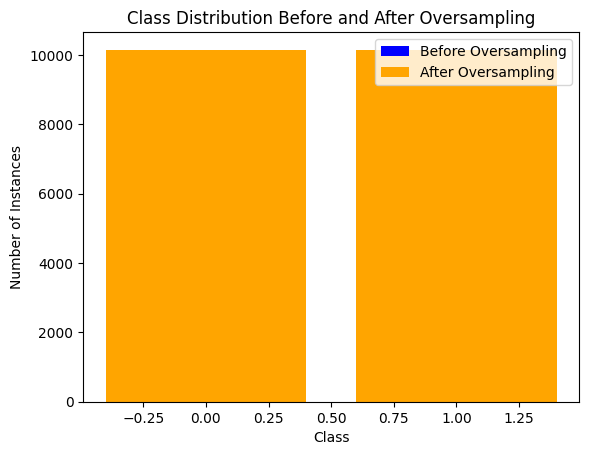

In [ ]:
from imblearn.over_sampling import SMOTE, RandomOverSampler
from collections import Counter
import matplotlib.pyplot as plt


x = df.drop(columns=['leave_STAY'])
y = df.leave_STAY # contains the target variable

# The output will show the class distribution before applying SMOTE.
print('before',Counter(y))

smote = SMOTE()
smotex, smotey = smote.fit_resample(x, y)

print('after', Counter(smotey))

plt.bar(Counter(y).keys(), Counter(y).values(), color='blue', label='Before Oversampling')
plt.bar(Counter(smotey).keys(), Counter(smotey).values(), color='orange', label='After Oversampling')
plt.legend()
plt.xlabel('Class')
plt.ylabel('Number of Instances')
plt.title('Class Distribution Before and After Oversampling')
plt.show()


In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

for col in x:
  smotex[col] = smotex[col].astype(float)
  smotex[[col]] = scaler.fit_transform(smotex[[col]])

smotex.head()

,income,overage,leftover,house,handset_price,over_15mins_calls_per_month,average_call_duration,college_zero,reported_satisfaction_sat,reported_satisfaction_unsat,reported_satisfaction_very_sat,reported_satisfaction_very_unsat,reported_usage_level_high,reported_usage_level_little,reported_usage_level_very_high,reported_usage_level_very_little,considering_change_of_plan_considering,considering_change_of_plan_never_thought,considering_change_of_plan_no,considering_change_of_plan_perhaps
0,-1.17,-1.01,-0.67,-0.71,-1.08,-0.91,-0.45,1.00,-0.23,1.98,-0.59,-0.81,-0.34,1.23,-0.59,-0.51,-0.81,-0.34,1.98,-0.24
1,-1.07,-1.01,-0.41,1.24,-0.69,-0.91,0.01,-1.00,-0.23,1.98,-0.59,-0.81,-0.34,1.23,-0.59,-0.51,1.23,-0.34,-0.51,-0.24
2,-1.28,1.71,-0.90,-0.75,-0.89,0.93,1.87,-1.00,-0.23,1.98,-0.59,-0.81,-0.34,-0.81,-0.59,1.98,-0.81,-0.34,-0.51,4.21
3,0.97,-0.56,0.35,1.19,1.87,-0.57,-0.92,1.00,-0.23,1.98,-0.59,-0.81,-0.34,-0.81,1.70,-0.51,1.23,-0.34,-0.51,-0.24
4,-1.23,1.45,2.15,-1.07,-0.70,1.50,-1.15,-1.00,-0.23,-0.50,-0.59,1.23,-0.34,1.23,-0.59,-0.51,-0.81,2.97,-0.51,-0.24


In [ ]:
from sklearn.model_selection import train_test_split



xtrain_, xtest_, ytrain_, ytest_ = train_test_split(smotex, smotey, test_size=0.2, random_state = 42)

In [ ]:
def get_score(names, models, _X_train, _y_train, _X_test, _y_test, index):
    res = {' ':[index]} # key and a list containing the provided index as the value.
    for n, model in enumerate(models):
      trained = model.fit(_X_train, _y_train)
      score = trained.score(_X_test, _y_test)
      res[names[n]] = score
    df = pd.DataFrame(res).set_index(' ') # Converts the res dictionary into a DataFrame using pandas (pd.DataFrame(res))
    return df



In [ ]:
def get_validators():
  NN = MLPClassifier(max_iter = 1000)
  LR = LogisticRegression(max_iter = 1000)
  SVM = SVC()
  ABC = AdaBoostClassifier()
  GBC = GradientBoostingClassifier()
  KNN = KNeighborsClassifier()
  GNB = GaussianNB()
  ET = ExtraTreesClassifier()
  RF = RandomForestClassifier()
  DT = DecisionTreeClassifier()
  XGB = XGBClassifier()

  return ([     'Neural Network',
                'Logistic Regression',
                'Support Vector Machine',
                'Ada Boost Classifier',
                'Gradient Boosting Classifier',
                'K-Nearest Neighbors',
               'Gaussian Naive Bayes',
               'Extra Trees',
               'Random Forest',
               'Decision Tree',
               'XGB Classifier'],
          [NN, LR, SVM, ABC, GBC, KNN, GNB, ET, RF, DT, XGB])

In [ ]:
names, models = get_validators()
scores = get_score(names, models, xtrain_, ytrain_, xtest_, ytest_, 'Churn_Accu')

scores

,Neural Network,Logistic Regression,Support Vector Machine,Ada Boost Classifier,Gradient Boosting Classifier,K-Nearest Neighbors,Gaussian Naive Bayes,Extra Trees,Random Forest,Decision Tree,XGB Classifier
,,,,,,,,,,,
Churn_Accu,0.67,0.64,0.67,0.67,0.71,0.62,0.62,0.68,0.70,0.62,0.69


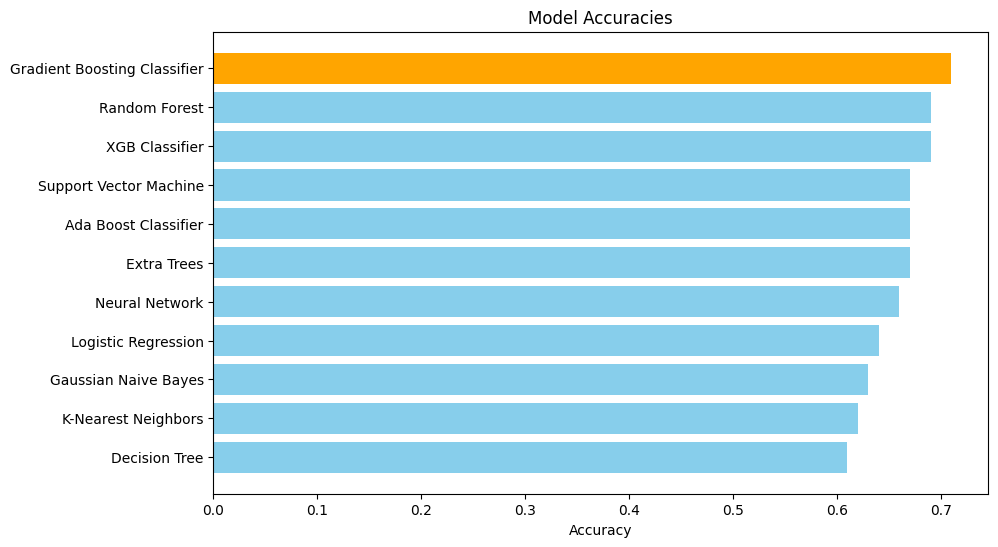

In [ ]:
import matplotlib.pyplot as plt

# Model names and accuracy scores
models = [
    'Neural Network', 'Logistic Regression', 'Support Vector Machine',
    'Ada Boost Classifier', 'Gradient Boosting Classifier',
    'K-Nearest Neighbors', 'Gaussian Naive Bayes', 'Extra Trees',
    'Random Forest', 'Decision Tree', 'XGB Classifier'
]
accuracies = [
    0.66, 0.64, 0.67, 0.67, 0.71, 0.62, 0.63, 0.67, 0.69, 0.61, 0.69
]

# Sort models and accuracies by accuracy in descending order
sorted_indices = sorted(range(len(accuracies)), key=lambda k: accuracies[k], reverse=True)
sorted_models = [models[i] for i in sorted_indices]
sorted_accuracies = [accuracies[i] for i in sorted_indices]

# Highlight the highest accuracy
colors = ['orange' if acc == max(sorted_accuracies) else 'skyblue' for acc in sorted_accuracies]

# Create bar plot
plt.figure(figsize=(10, 6))
plt.barh(sorted_models, sorted_accuracies, color=colors)
plt.xlabel('Accuracy')
plt.title('Model Accuracies')
plt.gca().invert_yaxis()  # Invert y-axis to show highest accuracy on top
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split

xtrain, xtest, ytrain, ytest = train_test_split( smotex, smotey, test_size = 0.2 )

from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import * #ExtraTreesClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.tree import *

from sklearn import model_selection
from sklearn.model_selection import cross_val_score
from matplotlib.colors import ListedColormap
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import roc_auc_score

In [ ]:
def cross_validate(names, models, _X_train, _y_train, index, cv=10):
  res = []
  for model in models:
    draft = model_selection.cross_val_score(model, _X_train, _y_train, cv=cv)
    res.append(draft)
  index = [index+' CV_' + str(i) for i in range(cv)]
  accuracy = pd.DataFrame(np.array(res).T,
                          columns=names,
                          index=index,
                          ).round(decimals=3)
  return accuracy

In [ ]:
model_names, models = get_validators()
accuracy = cross_validate(model_names, models, xtrain, ytrain, 'Churn_CV')
accuracy

,Neural Network,Logistic Regression,Support Vector Machine,Ada Boost Classifier,Gradient Boosting Classifier,K-Nearest Neighbors,Gaussian Naive Bayes,Extra Trees,Random Forest,Decision Tree,XGB Classifier
Churn_CV CV_0,0.65,0.65,0.65,0.65,0.69,0.61,0.62,0.66,0.69,0.62,0.68
Churn_CV CV_1,0.65,0.64,0.67,0.67,0.70,0.60,0.62,0.69,0.70,0.63,0.70
Churn_CV CV_2,0.65,0.66,0.69,0.68,0.72,0.63,0.64,0.70,0.71,0.61,0.70
Churn_CV CV_3,0.66,0.64,0.67,0.66,0.71,0.62,0.63,0.67,0.70,0.62,0.69
Churn_CV CV_4,0.67,0.65,0.67,0.67,0.70,0.62,0.64,0.67,0.71,0.61,0.69
Churn_CV CV_5,0.66,0.63,0.67,0.68,0.72,0.62,0.61,0.68,0.71,0.62,0.71
Churn_CV CV_6,0.66,0.63,0.67,0.67,0.71,0.62,0.61,0.69,0.70,0.62,0.71
Churn_CV CV_7,0.65,0.64,0.67,0.66,0.70,0.61,0.63,0.66,0.69,0.63,0.70
Churn_CV CV_8,0.64,0.64,0.66,0.67,0.68,0.60,0.63,0.66,0.68,0.62,0.68
Churn_CV CV_9,0.64,0.63,0.65,0.66,0.71,0.61,0.62,0.67,0.70,0.63,0.69


In [ ]:

data = {
    'Neural Network': [0.65, 0.65, 0.65, 0.66, 0.67, 0.66, 0.66, 0.65, 0.64, 0.64],
    'Logistic Regression': [0.65, 0.64, 0.66, 0.64, 0.65, 0.63, 0.63, 0.64, 0.64, 0.63],
    'Support Vector Machine': [0.65, 0.67, 0.69, 0.67, 0.67, 0.67, 0.67, 0.67, 0.66, 0.65],
    'Ada Boost Classifier': [0.65, 0.67, 0.68, 0.66, 0.67, 0.68, 0.67, 0.66, 0.67, 0.66],
    'Gradient Boosting Classifier': [0.69, 0.70, 0.72, 0.71, 0.70, 0.72, 0.71, 0.70, 0.68, 0.71],
    'K-Nearest Neighbors': [0.61, 0.60, 0.63, 0.62, 0.62, 0.62, 0.62, 0.61, 0.60, 0.61],
    'Gaussian Naive Bayes': [0.62, 0.62, 0.64, 0.63, 0.64, 0.61, 0.61, 0.63, 0.63, 0.62],
    'Extra Trees': [0.66, 0.69, 0.70, 0.67, 0.67, 0.68, 0.69, 0.66, 0.66, 0.67],
    'Random Forest': [0.69, 0.70, 0.71, 0.70, 0.71, 0.71, 0.70, 0.69, 0.68, 0.70],
    'Decision Tree': [0.62, 0.63, 0.61, 0.62, 0.61, 0.62, 0.62, 0.63, 0.62, 0.63],
    'XGB Classifier': [0.68, 0.70, 0.70, 0.69, 0.69, 0.71, 0.71, 0.70, 0.68, 0.69]
}

# Calculate mean accuracy for each classifier
mean_accuracies = {classifier: np.mean(acc) for classifier, acc in data.items()}

print("Mean accuracies for each classifier:")
for classifier, mean_acc in mean_accuracies.items():
    print(f"{classifier}: {mean_acc}")

Mean accuracies for each classifier:
Neural Network: 0.6529999999999999
Logistic Regression: 0.6409999999999999
Support Vector Machine: 0.667
Ada Boost Classifier: 0.667
Gradient Boosting Classifier: 0.704
K-Nearest Neighbors: 0.614
Gaussian Naive Bayes: 0.625
Extra Trees: 0.675
Random Forest: 0.699
Decision Tree: 0.621
XGB Classifier: 0.695


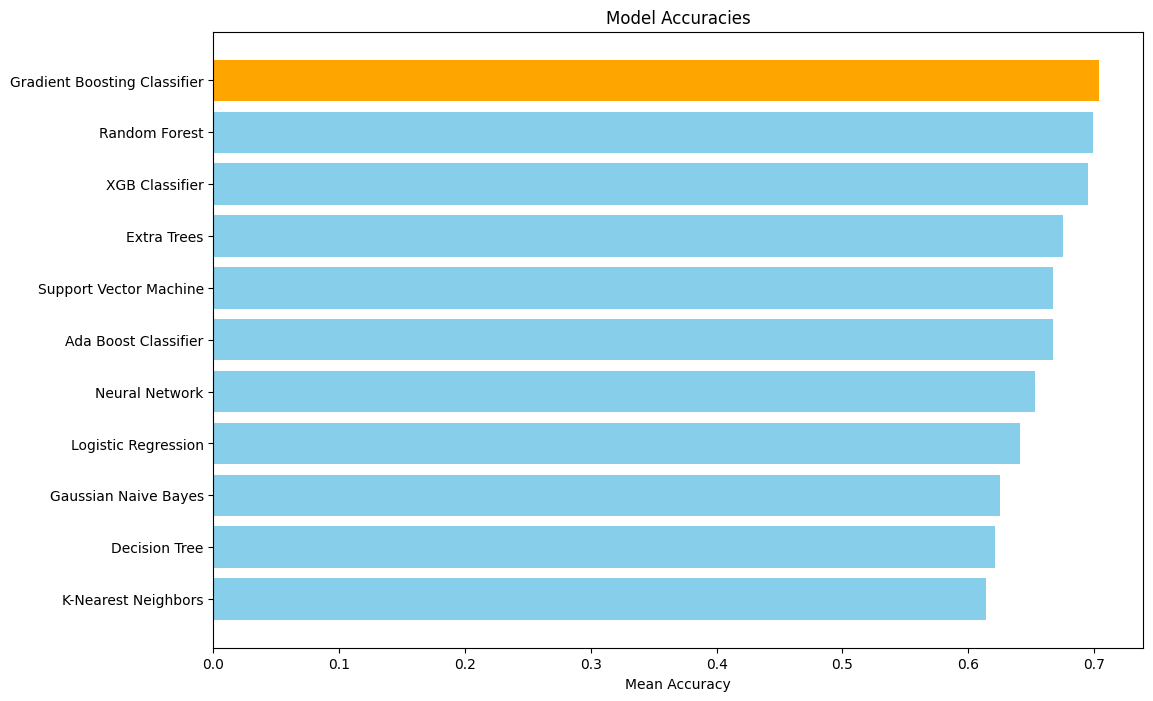

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Data
data = {
    'Neural Network': [0.65, 0.65, 0.65, 0.66, 0.67, 0.66, 0.66, 0.65, 0.64, 0.64],
    'Logistic Regression': [0.65, 0.64, 0.66, 0.64, 0.65, 0.63, 0.63, 0.64, 0.64, 0.63],
    'Support Vector Machine': [0.65, 0.67, 0.69, 0.67, 0.67, 0.67, 0.67, 0.67, 0.66, 0.65],
    'Ada Boost Classifier': [0.65, 0.67, 0.68, 0.66, 0.67, 0.68, 0.67, 0.66, 0.67, 0.66],
    'Gradient Boosting Classifier': [0.69, 0.70, 0.72, 0.71, 0.70, 0.72, 0.71, 0.70, 0.68, 0.71],
    'K-Nearest Neighbors': [0.61, 0.60, 0.63, 0.62, 0.62, 0.62, 0.62, 0.61, 0.60, 0.61],
    'Gaussian Naive Bayes': [0.62, 0.62, 0.64, 0.63, 0.64, 0.61, 0.61, 0.63, 0.63, 0.62],
    'Extra Trees': [0.66, 0.69, 0.70, 0.67, 0.67, 0.68, 0.69, 0.66, 0.66, 0.67],
    'Random Forest': [0.69, 0.70, 0.71, 0.70, 0.71, 0.71, 0.70, 0.69, 0.68, 0.70],
    'Decision Tree': [0.62, 0.63, 0.61, 0.62, 0.61, 0.62, 0.62, 0.63, 0.62, 0.63],
    'XGB Classifier': [0.68, 0.70, 0.70, 0.69, 0.69, 0.71, 0.71, 0.70, 0.68, 0.69]
}

# Calculate mean accuracies
mean_accuracies = {model: np.mean(acc) for model, acc in data.items()}

# Sort models by mean accuracy in descending order
sorted_models = sorted(mean_accuracies.keys(), key=lambda x: mean_accuracies[x], reverse=True)
sorted_mean_accuracies = [mean_accuracies[model] for model in sorted_models]

# Highlight the highest accuracy
colors = ['orange' if acc == max(sorted_mean_accuracies) else 'skyblue' for acc in sorted_mean_accuracies]

# Create bar plot
plt.figure(figsize=(12, 8))
plt.barh(sorted_models, sorted_mean_accuracies, color=colors)
plt.xlabel('Mean Accuracy')
plt.title('Model Accuracies')
plt.gca().invert_yaxis()  # Invert y-axis to show highest accuracy on top
plt.show()

# CONCLUSION WITH THE EXPERIMENTS

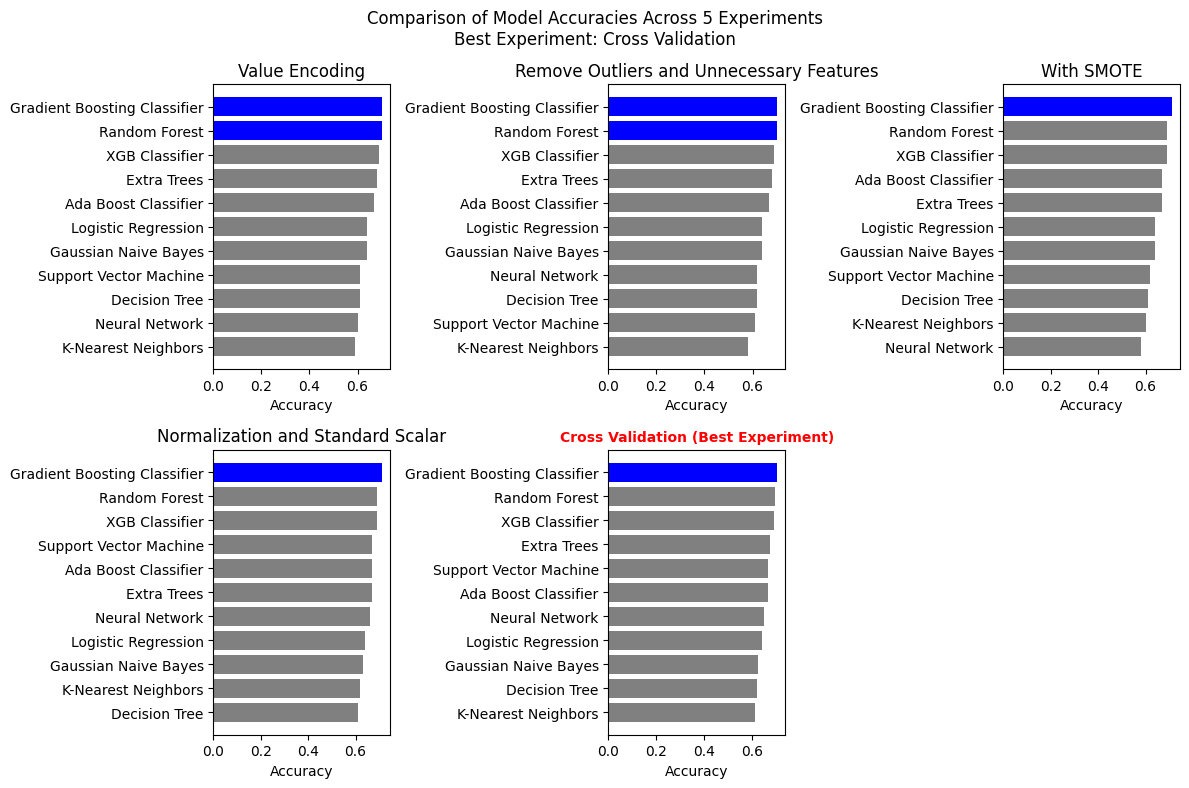

In [ ]:
import matplotlib.pyplot as plt

# Define the data for each experiment
experiments = {
    "Value Encoding": {
        'Neural Network': 0.60,
        'Logistic Regression': 0.64,
        'Support Vector Machine': 0.61,
        'Ada Boost Classifier': 0.67,
        'Gradient Boosting Classifier': 0.70,
        'K-Nearest Neighbors': 0.59,
        'Gaussian Naive Bayes': 0.64,
        'Extra Trees': 0.68,
        'Random Forest': 0.70,
        'Decision Tree': 0.61,
        'XGB Classifier': 0.69
    },
    "Remove Outliers and Unnecessary Features": {
        'Neural Network': 0.62,
        'Logistic Regression': 0.64,
        'Support Vector Machine': 0.61,
        'Ada Boost Classifier': 0.67,
        'Gradient Boosting Classifier': 0.70,
        'K-Nearest Neighbors': 0.58,
        'Gaussian Naive Bayes': 0.64,
        'Extra Trees': 0.68,
        'Random Forest': 0.70,
        'Decision Tree': 0.62,
        'XGB Classifier': 0.69
    },
    "With SMOTE": {
        'Neural Network': 0.58,
        'Logistic Regression': 0.64,
        'Support Vector Machine': 0.62,
        'Ada Boost Classifier': 0.67,
        'Gradient Boosting Classifier': 0.71,
        'K-Nearest Neighbors': 0.60,
        'Gaussian Naive Bayes': 0.64,
        'Extra Trees': 0.67,
        'Random Forest': 0.69,
        'Decision Tree': 0.61,
        'XGB Classifier': 0.69
    },
    "Normalization and Standard Scalar": {
        'Neural Network': 0.66,
        'Logistic Regression': 0.64,
        'Support Vector Machine': 0.67,
        'Ada Boost Classifier': 0.67,
        'Gradient Boosting Classifier': 0.71,
        'K-Nearest Neighbors': 0.62,
        'Gaussian Naive Bayes': 0.63,
        'Extra Trees': 0.67,
        'Random Forest': 0.69,
        'Decision Tree': 0.61,
        'XGB Classifier': 0.69
    },
    "Cross Validation": {
        'Neural Network': 0.653,
        'Logistic Regression': 0.641,
        'Support Vector Machine': 0.667,
        'Ada Boost Classifier': 0.667,
        'Gradient Boosting Classifier': 0.704,
        'K-Nearest Neighbors': 0.614,
        'Gaussian Naive Bayes': 0.625,
        'Extra Trees': 0.675,
        'Random Forest': 0.699,
        'Decision Tree': 0.621,
        'XGB Classifier': 0.695
    }
}

# Find the experiment with the highest average accuracy
best_experiment = max(experiments, key=lambda x: sum(experiments[x].values()) / len(experiments[x]))

# Plotting
plt.figure(figsize=(12, 8))

for i, (exp_name, accuracies) in enumerate(experiments.items(), start=1):
    plt.subplot(2, 3, i)
    sorted_accuracies = sorted(accuracies.items(), key=lambda x: x[1], reverse=True)
    models, scores = zip(*sorted_accuracies)
    plt.barh(models, scores, color=['blue' if s == max(scores) else 'grey' for s in scores])
    plt.xlabel('Accuracy')
    if exp_name == best_experiment:
        plt.title(f'{exp_name} (Best Experiment)', fontsize=10, fontweight='bold', color='red')
    else:
        plt.title(exp_name)
    plt.gca().invert_yaxis()

# Add title and subtitle for the best experiment
plt.suptitle(f'Comparison of Model Accuracies Across 5 Experiments\nBest Experiment: {best_experiment}', fontsize=12)
plt.tight_layout()
plt.show()
